In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [42]:
#Counties adjacent to Allegheny: ["Washington","Beaver","Butler","Armstrong","Westmoreland"]
#relevant_counties = ["Allegheny County","Washington","Beaver","Butler","Armstrong","Westmoreland"]

state = "PA"
county = ["Allegheny County"]
week_window = 6
first_relevant_week = '3/2/20'

relevant_county_names = county
days_window = week_window*7

george_floyd_protest_start = '5/30/20'
pa_phase_yellow_date = '5/15/20'
pa_phase_green_date = '6/5/20'

In [18]:
def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%m/%d/%Y")
    d2 = datetime.strptime(d2, "%m/%d/%Y")
    return abs((d2 - d1).days)

In [19]:
# Data Load
covid_df = pd.read_csv("covid_confirmed_usafacts.csv")
pa_covid_df = covid_df[covid_df["State"] == state]


In [20]:
# Data Processing

## Data Filtering
county_covid_df = pa_covid_df[pa_covid_df["County Name"].isin(relevant_county_names)]

## Data Transformation
contained_dates = [a for a in county_covid_df.columns[4:]]
transformed_county_covid_df = county_covid_df[contained_dates].transpose()
transformed_county_covid_df = transformed_county_covid_df.rename(
    columns = {transformed_county_covid_df.columns[0]:"cases"}
)
relevant_county_covid_df = transformed_county_covid_df[transformed_county_covid_df.index > first_relevant_week]

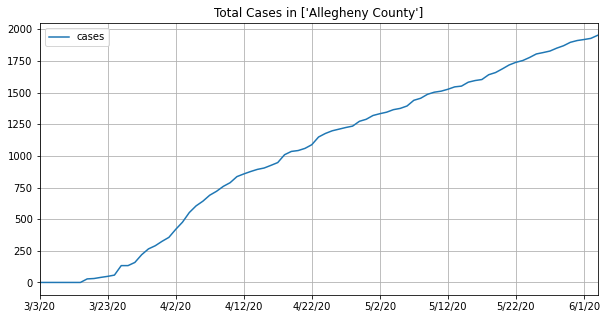

In [21]:
# Plot Total Cases
relevant_county_covid_df.plot(y="cases",
                                 figsize = (10,5),
                                 title = "Total Cases in " + str(relevant_county_names)
)

plt.grid()
plt.savefig('TotalCases.png')

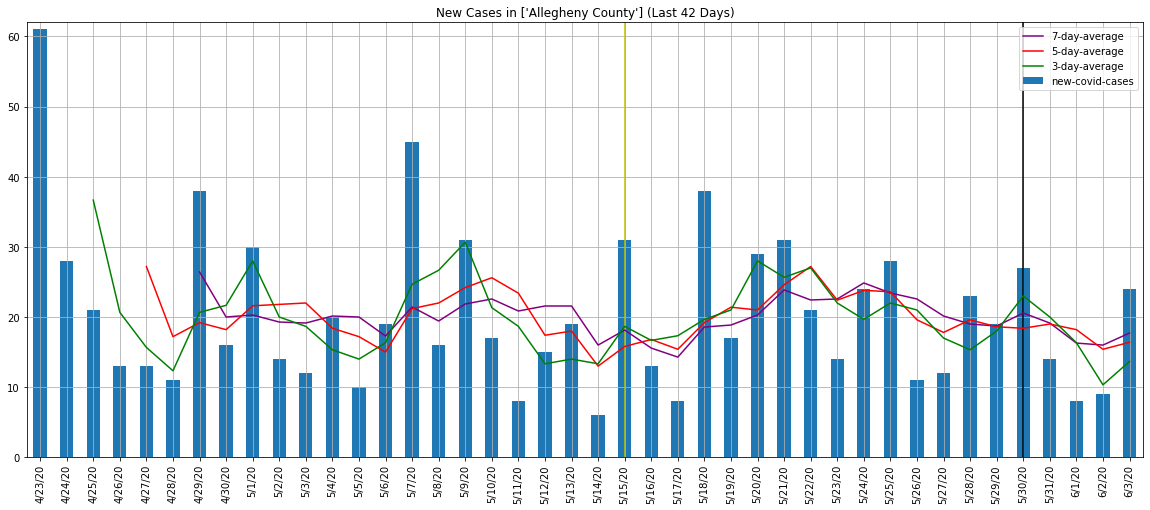

In [40]:
# Plot New Cases
diff_df = relevant_county_covid_df.diff()
diff_df = diff_df.tail(days_window).rename(columns = {"cases":"new-covid-cases"})

rolling_avg_7_day_df = diff_df.rolling(7).mean()
rolling_avg_5_day_df = diff_df.rolling(5).mean()
rolling_avg_3_day_df = diff_df.rolling(3).mean()

ymax = diff_df["new-covid-cases"].max()
xmax = diff_df.shape[0]

diff_df.plot(y = "new-covid-cases",
             kind = "bar", figsize = (20,8),
             title = "New Cases in " + str(county) + " (Last " + str(days_window) + " Days)")
plt.ylim(0,ymax+1)

#hacky fixes for year - fix at later point
phase_yellow_location = days_between(pa_phase_yellow_date+str(20),diff_df.index[-1]+str(20)) + 1
plt.vlines(x = xmax-phase_yellow_location,
           ymin = 0,
           ymax = ymax+1,
           colors='y')

george_floyd_start_location = days_between(george_floyd_protest_start+str(20),diff_df.index[-1]+str(20)) + 1
plt.vlines(x = xmax-george_floyd_start_location,
           ymin = 0,
           ymax = ymax+1,
           colors='black')

# phase_green_location = days_between(pa_phase_green_date+str(20),diff_df.index[-1]+str(20)) + 1
# plt.vlines(x = xmax-phase_green_location,
#            ymin = 0,
#            ymax = ymax+1,
#            colors='green')

plt.plot(rolling_avg_7_day_df['new-covid-cases'],'purple',label = "7-day-average")
plt.plot(rolling_avg_5_day_df['new-covid-cases'],'red',label = "5-day-average")
plt.plot(rolling_avg_3_day_df['new-covid-cases'],'green',label = "3-day-average")

plt.legend()
plt.grid()
plt.savefig('NewCases.png')